# Processamento de dados Institucional

## 1. Imports

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from typing import List, Dict, Tuple

# Perguntas
df_dados_perguntas_raw = pd.read_csv('../raw/dados_institucional_perguntas.csv')
df_dados_info_perguntas_raw = pd.read_csv('../raw/dados_institucional_info_perguntas.csv')
df_dados_info_questionarios_raw = pd.read_csv('../raw/dados_institucional_info_questionarios.csv')
# Unidades
df_dados_unidades_raw = pd.read_csv('../raw/dados_institucional_unidades.csv')

# Pesquisa
df_dados_pesquisa_raw = pd.read_csv('../raw/dados_institucional_pesquisa.csv')

## 2. Funções para descrição de dataframes

In [2]:
def get_possible_results(df: pd.DataFrame) -> Dict:
    ''' 
    Return:
    - data: Dictionary where the keys are the columns values and values are a list containing all possible values in a column. Order of appearance is preserved by .unique().
    
    '''
    cols = df.columns
    data = dict()

    for col in cols:
        data[col] = df[col].unique().tolist()

    return data

In [3]:
def remove_unnamed_columns(df: pd.DataFrame) -> pd.DataFrame:
    ''' 
    Laziness in manually processing data before transforming it into dataframes.

    Remove all the 'Unnamed' columns in a dataframe.
    '''
    return df.loc[:,~df.columns.str.contains('^Unnamed')]

In [4]:
def count_occurrences_by_column(df: pd.DataFrame,columns: List|None = None) -> Dict:
    columns_to_process = columns if columns is not None else df.columns

    occurrences = {}

    for col in columns_to_process:
        occurrences[col] = df[col].value_counts()

    return occurrences

### 2.1 Testes

In [5]:
print(get_possible_results(remove_unnamed_columns(df_dados_info_perguntas_raw)))

{'Tipo_Perg': ['MsãoPDI', 'RsSc', 'PolPes', 'OrgGesInst', 'SustFin', 'CHC'], 'Grupo_de_Perguntas': ['Missão e Plano de Desenvolvimento Institucional', 'Responsabilidade Social', 'Políticas de Pessoal', 'Organização e Gestão da Instituição', 'Sustentabilidade Financeira', 'Complexo do Hospital de Clínicas (CHC-UFPR/Ebserh)']}


In [6]:
remove_unnamed_columns(df_dados_info_questionarios_raw)


,ID_QUESTIONARIO,QUESTIONARIO
0,644,Missão e Plano de Desenvolvimento Institucional
1,645,Responsabilidade Social
2,646,Políticas de Pessoal
3,647,Organização e Gestão da Instituição
4,648,Sustentabilidade Financeira
5,649,Complexo do Hospital de Clínicas (CHC-UFPR/Ebs...


In [7]:
ocorrencias = count_occurrences_by_column(df_dados_pesquisa_raw)

for coluna, contagem in ocorrencias.items():
    print(f"--- Frequência: {coluna} ---")
    print(contagem.to_string())
    print("\n")

--- Frequência: ID_PESQUISA ---
ID_PESQUISA
47185    210
47352    210
47730    210
47473    210
47769    204
47291    186
47343    140
47385    140
47243    140
47821    140
47187    140
46982    140
47384    140
47776    140
47061    140
47244    140
47360    140
47689    140
47808    140
47188    140
47729    140
47304    140
47085    140
47739    140
47169    140
47090    140
47286    140
47757    140
46991    140
47070    140
47354    140
47398    140
47399    140
47392    140
47623    140
47529    140
47761    140
47475    140
47490    140
47595    140
47569    140
47517    140
47533    140
47500    140
47004    140
47876    140
47899    140
47902    140
47293    138
47315    138
47603    138
47302    138
47383    138
47179    138
47069    138
47535    138
47802    138
47089    138
47656    138
47159    138
47167    138
47097    138
46983    136
47845    136
47884    136
47670    134
47494    100
47105    100
47214    100
47627    100
47449     98
47877     94
47681     88
47341  

## 3. Verificação de possíveis dados na tabela principal

Nesta parte, traremos informações relevantes para uma única tabelas (em torno da tabela `df_dados_pesquisa`).

Aqui veremos a relação de cada tabela com a nossa principal.

### 3.1 Info_Perguntas e Info_Questionários

---

In [8]:
df_dados_info_perguntas_raw = remove_unnamed_columns(df_dados_info_perguntas_raw)
df_dados_info_perguntas_raw

,Tipo_Perg,Grupo_de_Perguntas
0,MsãoPDI,Missão e Plano de Desenvolvimento Institucional
1,RsSc,Responsabilidade Social
2,PolPes,Políticas de Pessoal
3,OrgGesInst,Organização e Gestão da Instituição
4,SustFin,Sustentabilidade Financeira
5,CHC,Complexo do Hospital de Clínicas (CHC-UFPR/Ebs...


Talvez seja uma boa ideia trazer o `Tipo_Perg` para a tabela principal, pois tornaria mais fácil a visualização da distribuição de respostas na tabela principal.

---

In [9]:
df_dados_info_questionarios_raw = remove_unnamed_columns(df_dados_info_questionarios_raw)
df_dados_info_questionarios_raw

,ID_QUESTIONARIO,QUESTIONARIO
0,644,Missão e Plano de Desenvolvimento Institucional
1,645,Responsabilidade Social
2,646,Políticas de Pessoal
3,647,Organização e Gestão da Instituição
4,648,Sustentabilidade Financeira
5,649,Complexo do Hospital de Clínicas (CHC-UFPR/Ebs...


Ambas as informações já estão na tabela principal.

### 3.2 Unidades

In [10]:
df_dados_unidades_raw

,SIGLA_LOTACAO,UNIDADE GESTORA,LOTACAO
0,AC/DEARTES,"Setor de Artes, Comunicação e Design",Departamento de Artes
1,AC/DECOM,"Setor de Artes, Comunicação e Design",Departamento de Comunicação Social
2,AG/CCEIM,Setor de Ciências Agrárias,Coordenação do Curso de Engenharia Industrial ...
3,AG/DERE,Setor de Ciências Agrárias,Departamento de Economia Rural e Extensão
4,AG/DETF,Setor de Ciências Agrárias,Departamento de Engenharia e Tecnologia Florestal
...,...,...,...
310,UNIMULTI/SMFR,Hospital de Clínicas,Serviço Medicina Física e Reabilitação
311,UNP/NEUROMUSC,Hospital de Clínicas,Serviço de Doenças Neuromusculares
312,UPAT/SCBM,Hospital de Clínicas,Seção de Cadastro de Bens Móveis
313,UUEA/CTSIADULTO,Hospital de Clínicas,Centro de Terapia Semi Intensiva Adulto


A única coluna que não aparece na tabela principal é a `UNIDADE GESTORA`

---

### 3.3 Perguntas

Colunas de `df_dados_perguntas_raw`:
* `ID_PERGUNTA` - Está na tabela principal; Autoexplicativo
* `ID_QUESTIONARIO` - Está na tabela principal; Autoexplicativo
* `TITULO` - Está na tabela principal; Equivalente à `QUESTIONARIO`
* `CL_PERGUNTA` - Não está na tabela principal;Todas as observações são `Institucional`
* `Ordem` - Não está na tabela principal; Ordem das perguntas feitas em cada questionário
* `Coluna1` - Não está na tabela principal; Equivalente à `Tipo_Perg` da tabela `df_dados_info_perguntas_raw`
* `PERGUNTA` - Está na tabela principal; Autoexplicativo

## 4. Merge

In [11]:
df_temp_info_perg = df_dados_info_perguntas_raw.rename(columns={'Grupo_de_Perguntas':'QUESTIONARIO'})


In [12]:
# Merge `Tipo_Perg` 
df_merged_institucional2025 = pd.merge(left=df_dados_pesquisa_raw,right=df_temp_info_perg,on='QUESTIONARIO',how='left')

# Merge `Unidade Gestora`
df_merged_institucional2025 = pd.merge(left=df_merged_institucional2025,right=df_dados_unidades_raw[['SIGLA_LOTACAO','UNIDADE GESTORA']],on='SIGLA_LOTACAO',how='left')

# Merge `Ordem`
df_merged_institucional2025 = pd.merge(left=df_merged_institucional2025,right=df_dados_perguntas_raw[['ID_PERGUNTA','Ordem']],on='ID_PERGUNTA',how='left')

df_merged_institucional2025

,ID_PESQUISA,ID_QUESTIONARIO,QUESTIONARIO,ID_PERGUNTA,PERGUNTA,RESPOSTA,SITUACAO,LOTACAO,SIGLA_LOTACAO,Tipo_Perg,UNIDADE GESTORA,Ordem
0,46962,644,Missão e Plano de Desenvolvimento Institucional,1982,A missão* da UFPR é coerente com as necessidad...,Concordo,Fim respostas,Assessoria Técnica,GAB/ASS,MsãoPDI,Gabinete da Reitoria,1.0
1,46962,644,Missão e Plano de Desenvolvimento Institucional,1983,Percebe-se que a sociedade reconhece a relevân...,Concordo,Fim respostas,Assessoria Técnica,GAB/ASS,MsãoPDI,Gabinete da Reitoria,2.0
2,46962,644,Missão e Plano de Desenvolvimento Institucional,1984,"Enquanto servidor (docente ou técnico), tenho ...",Concordo,Fim respostas,Assessoria Técnica,GAB/ASS,MsãoPDI,Gabinete da Reitoria,3.0
3,46962,644,Missão e Plano de Desenvolvimento Institucional,1985,Percebo o envolvimento de diversos atores da u...,Concordo,Fim respostas,Assessoria Técnica,GAB/ASS,MsãoPDI,Gabinete da Reitoria,4.0
4,46962,644,Missão e Plano de Desenvolvimento Institucional,1986,Os objetivos estratégicos do Plano de Desenvol...,Concordo,Fim respostas,Assessoria Técnica,GAB/ASS,MsãoPDI,Gabinete da Reitoria,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
50274,47904,649,Complexo do Hospital de Clínicas (CHC-UFPR/Ebs...,2053,A política de gestão da qualidade e segurança ...,Concordo,Fim respostas,Serviço Métodos Cardiológicos,UCP/SMCARD,CHC,Hospital de Clínicas,71.0
50275,47904,649,Complexo do Hospital de Clínicas (CHC-UFPR/Ebs...,2054,"É perceptível a adesão, de modo geral, dos pro...",Concordo,Fim respostas,Serviço Métodos Cardiológicos,UCP/SMCARD,CHC,Hospital de Clínicas,72.0
50276,47904,649,Complexo do Hospital de Clínicas (CHC-UFPR/Ebs...,2055,O Programa Ebserh de Gestão da Qualidade está ...,Concordo,Fim respostas,Serviço Métodos Cardiológicos,UCP/SMCARD,CHC,Hospital de Clínicas,73.0
50277,47904,649,Complexo do Hospital de Clínicas (CHC-UFPR/Ebs...,2056,As políticas de controle orçamentário e de alo...,Concordo,Fim respostas,Serviço Métodos Cardiológicos,UCP/SMCARD,CHC,Hospital de Clínicas,NaN


<Axes: xlabel='RESPOSTA'>

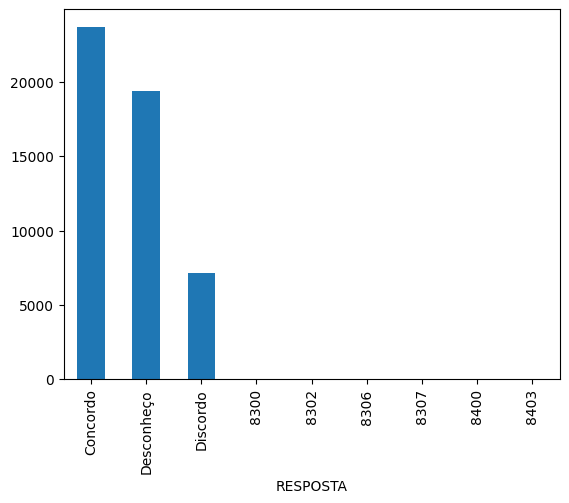

In [13]:
df = df_merged_institucional2025
df['RESPOSTA'].value_counts().plot(kind='bar')

Todos esses dados faltantes estão na mesma pergunta cujo `ID` é 2056. Portanto, iremos incrementar e inserir a ordem correta (74) .

In [14]:
df_merged_institucional2025.loc[df_merged_institucional2025['Ordem'] > 73, 'Ordem'] += 1
df_merged_institucional2025['Ordem'] = df_merged_institucional2025['Ordem'].fillna(74)

## 5. Visualização de Dados

In [15]:
import textwrap

def plot_data_dist(df: pd.DataFrame, column: str) -> plt.Figure:

    values = df[column].value_counts().sort_values(ascending=True)
    
    labels_quebrados = [textwrap.fill(label, width=30) for label in values.index.astype(str)]

    altura_figura = max(5, len(values) * 0.5)
    
    fig, ax = plt.subplots(figsize=(10, altura_figura))

    ax.barh(labels_quebrados, values.values, color='skyblue')

    # 5. ESTÉTICA
    ax.set_title(f"Distribuição: {column}", fontsize=14)
    ax.set_xlabel("Contagem") # No barh, o X é a contagem

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    ax.grid(axis='x', linestyle='--', alpha=0.7)

    plt.tight_layout()

    plt.close(fig)
    return fig

In [16]:
def plot_distribuicao_numerica(df, coluna):
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # histplot combina as barras com a linha de densidade (kde=True)
    sns.histplot(df[coluna], kde=True, bins=30, color='blue', ax=ax)
    
    # Linhas verticais para Média e Mediana (ajuda a ver assimetria)
    ax.axvline(df[coluna].mean(), color='red', linestyle='--', label='Média')
    ax.axvline(df[coluna].median(), color='green', linestyle='-', label='Mediana')
    
    ax.set_title(f"Distribuição de {coluna}")
    ax.legend()
    plt.close()
    return fig

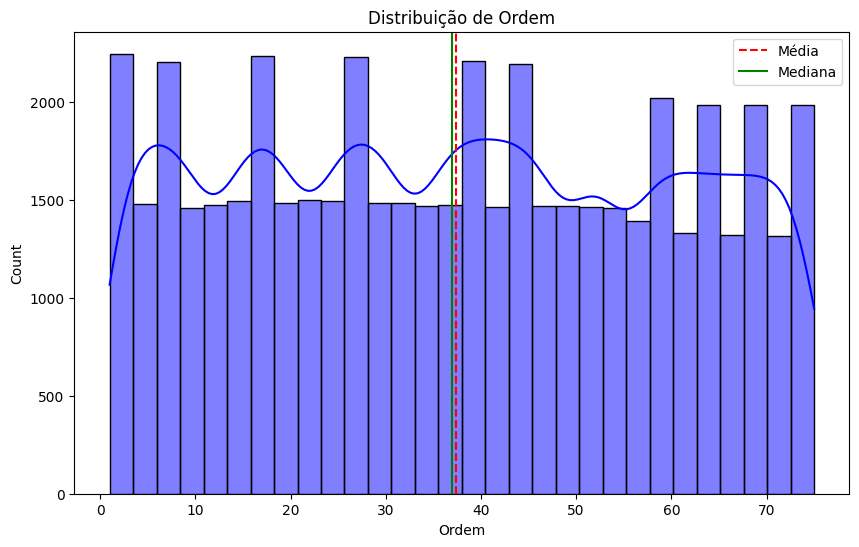

In [17]:
plot_distribuicao_numerica(df_merged_institucional2025,'Ordem')

## 6. Limpeza dos Dados

In [18]:
# Removendo dados com a resposta diferente do padrão
results = ['Concordo','Discordo','Desconheço']
df_merged_institucional2025 = df_merged_institucional2025[df_merged_institucional2025['RESPOSTA'].isin(results)]
temp_fig = plot_data_dist(df_merged_institucional2025,'RESPOSTA')
temp_fig.savefig('./temp_images/RESPOSTA_after')

In [24]:
# Remove missings  e duplicates
print('Antes de remover os missings: ')
print(df_merged_institucional2025.shape)
print('\nApós remover os missings: ')
df_merged_institucional2025.dropna().drop_duplicates()
print(df_merged_institucional2025.shape)

Antes de remover os missings: 
(50273, 12)

Após remover os missings: 
(50273, 12)


In [25]:
df_merged_institucional2025

,ID_PESQUISA,ID_QUESTIONARIO,QUESTIONARIO,ID_PERGUNTA,PERGUNTA,RESPOSTA,SITUACAO,LOTACAO,SIGLA_LOTACAO,Tipo_Perg,UNIDADE GESTORA,Ordem
0,46962,644,Missão e Plano de Desenvolvimento Institucional,1982,A missão* da UFPR é coerente com as necessidad...,Concordo,Fim respostas,Assessoria Técnica,GAB/ASS,MsãoPDI,Gabinete da Reitoria,1.0
1,46962,644,Missão e Plano de Desenvolvimento Institucional,1983,Percebe-se que a sociedade reconhece a relevân...,Concordo,Fim respostas,Assessoria Técnica,GAB/ASS,MsãoPDI,Gabinete da Reitoria,2.0
2,46962,644,Missão e Plano de Desenvolvimento Institucional,1984,"Enquanto servidor (docente ou técnico), tenho ...",Concordo,Fim respostas,Assessoria Técnica,GAB/ASS,MsãoPDI,Gabinete da Reitoria,3.0
3,46962,644,Missão e Plano de Desenvolvimento Institucional,1985,Percebo o envolvimento de diversos atores da u...,Concordo,Fim respostas,Assessoria Técnica,GAB/ASS,MsãoPDI,Gabinete da Reitoria,4.0
4,46962,644,Missão e Plano de Desenvolvimento Institucional,1986,Os objetivos estratégicos do Plano de Desenvol...,Concordo,Fim respostas,Assessoria Técnica,GAB/ASS,MsãoPDI,Gabinete da Reitoria,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
50274,47904,649,Complexo do Hospital de Clínicas (CHC-UFPR/Ebs...,2053,A política de gestão da qualidade e segurança ...,Concordo,Fim respostas,Serviço Métodos Cardiológicos,UCP/SMCARD,CHC,Hospital de Clínicas,71.0
50275,47904,649,Complexo do Hospital de Clínicas (CHC-UFPR/Ebs...,2054,"É perceptível a adesão, de modo geral, dos pro...",Concordo,Fim respostas,Serviço Métodos Cardiológicos,UCP/SMCARD,CHC,Hospital de Clínicas,72.0
50276,47904,649,Complexo do Hospital de Clínicas (CHC-UFPR/Ebs...,2055,O Programa Ebserh de Gestão da Qualidade está ...,Concordo,Fim respostas,Serviço Métodos Cardiológicos,UCP/SMCARD,CHC,Hospital de Clínicas,73.0
50277,47904,649,Complexo do Hospital de Clínicas (CHC-UFPR/Ebs...,2056,As políticas de controle orçamentário e de alo...,Concordo,Fim respostas,Serviço Métodos Cardiológicos,UCP/SMCARD,CHC,Hospital de Clínicas,74.0


## 7. Processando os Dados

In [ ]:
def add_axis(df: pd.DataFrame) -> (pd.DataFrame):
    possible_axis = {'PLANEJAMENTO_E_AVALIACAO_INSTITUCIONAL':[''],
                     'DESENVOLVIMENTO_INSTITUCIONAL':['MsãoPDI','RsSc'],
                     'POLITICAS_ACADEMICAS':[''],
                     'POLITICAS_DE_GESTAO':['PolPes','OrgGesInst','SustFin'],
                     'INFRAESTUTURA_FISICA':[''],
                     'COMPLEXO_DO_HOSPITAL_DE_CLINICAS':['CHC']}
    
    mapa_de_para = {}
    for eixo, lista_tags in possible_axis.items():
        for tag in lista_tags:
            mapa_de_para[tag] = eixo

    df['EIXO'] = df['Tipo_Perg'].map(mapa_de_para)

    return df

In [ ]:
def process(df: pd.DataFrame, axis: List[str] | None = None, dimensions:List[str] | None = None) -> (pd.DataFrame):
    possible_axis = {'PLANEJAMENTO_E_AVALIACAO_INSTITUCIONAL':[''],
                     'DESENVOLVIMENTO_INSTITUCIONAL':['MsãoPDI','RsSc'],
                     'POLITICAS_ACADEMICAS':[''],
                     'POLITICAS_DE_GESTAO':['PolPes','OrgGesInst','SustFin'],
                     'INFRAESTUTURA_FISICA':[''],
                     'COMPLEXO_DO_HOSPITAL_DE_CLINICAS':['CHC']}

    
    
